In [ ]:
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import scipy.signal
import pandas as pd
import IPython.display as ipd
import matplotlib.colors as mcolors
import scipy.stats as stats
from scipy.io import wavfile
import librosa
import wave


In [ ]:
SAMPLE_RATE = 20000
data_dir = '../data/'

data_file_list = glob(data_dir + '*.wav')
data_file_list[0]

In [ ]:
ipd.Audio(data_file_list[0])

## Reading and Plotting the Raw Neural Data Using the Wave Python Library

In [ ]:
input_wav = wave.open(data_file_list[0], 'rb')

print(f'input_wav.getframerate() [Sample Rate]: {input_wav.getframerate()}')
print(f'input_wav.getnframes() [Number of Samples]: {input_wav.getnframes()}')

sample_bytes = input_wav.readframes(input_wav.getnframes())
print(f'sample_bytes: {sample_bytes}')

# Calculating the time of the raw neural signal
time_endpoint = input_wav.getnframes() / input_wav.getframerate()
time_array = np.arange(start=0, stop=time_endpoint,
                       step=(1/input_wav.getframerate()))

signal_array = np.frombuffer(sample_bytes, dtype=np.int16)

# Normalizing the Array between -1 and 1
signal_array_normalized = signal_array / signal_array.max()

print(f'len(signal_array): {len(signal_array)}')
print(f'len(time_array): {len(time_array)}')

plt.figure(figsize=(12, 4))
plt.plot(time_array, signal_array_normalized)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Raw Neural Data Acquired using the Wave Audio Library')
plt.legend(['Normalized Raw Neural Signal'])
plt.show()

## Reading and Plotting the Raw Neural Data using the Librosa Library

In [ ]:
SAMPLE_RATE = 19531
raw_neural_data, sr = librosa.load(data_file_list[0], sr = SAMPLE_RATE)
print(f'Sample Rate From Librosa: {sr}')
raw_neural_data_bytes = raw_neural_data.tobytes()
print(f'len(raw_neural_data_bytes): {len(raw_neural_data_bytes)}')

stop_time = len(raw_neural_data) / SAMPLE_RATE
time = np.arange(0, stop_time, step=(1/SAMPLE_RATE))

plt.figure(figsize=(12, 4))
plt.plot(time, raw_neural_data)
plt.title('Raw Neural Data Vs. Time [s]')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(['Raw Neural Signal'])
plt.show()

## Reading and plotting the Raw Neural Data using SciPy

In [ ]:
filePath = data_file_list[0]
with open(filePath, 'rb') as file_to_read:
    wav_bytes = file_to_read.read()
file_to_read.close()

print(f'type(scipy_wav_obj): {type(wav_bytes)}')
scipy_signal_amplitude = np.frombuffer(wav_bytes, dtype=np.int16)
print(f'len(scipy_signal_amplitude): {len(scipy_signal_amplitude)}')

In [ ]:
wavfile.read(data_file_list[0])

## Comparing Methods of Reading the Audio Data Including SciPy, Wave, & Librosa

In [ ]:
# Testing SciPy
sample_rate_scipy, raw_audio_array_scipy = wavfile.read(data_file_list[0])

# Comparing Array Size
print(f'Comparing Array Size:')
print(f'Librosa loading of data: len(raw_neural_data): {len(raw_neural_data)}')
print(f'SciPy loading of data: len(raw_audio_array_scipy): {len(raw_audio_array_scipy)}')
print(f'Wave loading of data: len(signal_array): {len(signal_array)}')

print('\n')

# Comparing Sample Rates
print(f'Comparing Sample Rates:')
print(f'Sample Rate Librosa: {sr}')
print(f'Sample Rate SciPy: {sample_rate_scipy}')
print(f'Sample Rate Wave: {input_wav.getframerate()}')

print('\n')

# Plotting the Raw Neural Data read with SciPy
time_end = len(raw_audio_array_scipy) / sample_rate_scipy 
print(f'Time in seconds of the raw audio from scipy: {time_end}')

time_raw_audio_array_scipy = np.arange(start=0, stop=time_end, 
                                       step=(1/sample_rate_scipy))

len(time_raw_audio_array_scipy)

plt.plot(time_raw_audio_array_scipy, raw_audio_array_scipy)
plt.title('Raw Neural Data Read with SciPy')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(['Raw Neural Signal'])
plt.show()

## Detrending the Signal of the Raw Neural Data

In [ ]:
# It appears there is a trend in the data that is non-zero
detrend_y = scipy.signal.detrend(raw_neural_data)

# Plotting the Detrended Signal
plt.figure(figsize=(12, 4))
plt.plot(time, detrend_y, label='Detrended Signal')
plt.plot(time, raw_neural_data, label='Raw Signal')
plt.title('Detrended Neural Signal vs. Raw Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Frequency Analysis of Raw Neural Data

In [ ]:
FFT = np.fft.fft(detrend_y)
half_length_of_the_FFT = int(len(FFT)/2)

# Creating frequency bins
N = len(FFT)

freq_bins = np.arange(start=0, stop=(sr/2), step=(sr/N))

In [ ]:
len(freq_bins) == int(len(FFT)/2)

In [ ]:
psd = FFT * np.conj(FFT)/ len(FFT)

In [ ]:
psd = psd[0:len(psd)//2]

In [ ]:
# Plot the Frequency Domain Transform of the Detrended Neural Data
plt.figure(figsize=(12,4))
plt.plot(freq_bins[0:len(freq_bins)-1], abs(FFT[0:len(FFT)//2]), 
         label='FFT of the Detrended Neural Signal', linewidth=.1)
plt.title('Magnitude of the FFT of the Detrended Neural Data', fontsize=20)
plt.xlabel('Frequencies [Hz]', fontsize=20)
plt.ylabel('Magnitude', fontsize=20)
plt.legend()
plt.show()

In [ ]:
# Plot of the PSD of the Detrended Neural Data
plt.figure(figsize=(12,4))
plt.plot(freq_bins[0:len(freq_bins)-1], psd, 
         label='Power of the Detrended Neural Signal', linewidth=1)
plt.title('Power Spectral Density of the Detrended Neural Data', fontsize=20)
plt.xlabel('Frequencies [Hz]', fontsize=20)
plt.ylabel('Power', fontsize=20)
plt.legend()
plt.show()


In [ ]:
# Sorting the peaks and printing the corresponding indices:
freq_amplitudes = abs(FFT[0:int(len(FFT)/2)])
freq_amplitudes_df = pd.DataFrame(freq_amplitudes, columns = ['Amplitude'])
freq_amplitudes_df_sorted = freq_amplitudes_df.sort_values(by='Amplitude', ascending=False).head(20)

In [ ]:
freq_amplitudes_df_sorted.head()

In [ ]:
def fft_filter_custom(percentage, freq_bins, FFT):
    threshold = percentage * (2 * abs(FFT[0:len(FFT)//2]) / len(freq_bins)).max()
    print(f"threshold: {threshold}")
    filtered_FFT = FFT.copy()
    filtered_FFT_mag = np.abs(filtered_FFT)
    filtered_FFT_mag = 2*filtered_FFT_mag / len(freq_bins)
    filtered_FFT[filtered_FFT_mag <= threshold]=0
    return filtered_FFT

# Plotting the thresholded FFT
percentage = 0.25

fft_filtered_custom = fft_filter_custom(percentage, freq_bins, FFT)
time_filtered_custom = np.fft.ifft(fft_filtered_custom)




In [ ]:
plt.plot(freq_bins[0:len(freq_bins)-1], abs(FFT[0:len(FFT)//2]))
plt.title('Magnitude-Frequency Plot')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.legend(['FFT of the Detrended Neural Signal'])
plt.show()

# Magnitude-Frequency Plot of the Filtered Signal
plt.figure(figsize=(12, 4))
plt.plot(freq_bins[0:len(freq_bins)-1], np.abs(fft_filtered_custom[0:len(fft_filtered_custom)//2]))
plt.title('Magitude-Frequency Plot of the Filtered Fast Fourier Transform at %0.0f%% the Maximum Magnitude'% (percentage*100))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.legend(['Fast Fourier Transform of the Detrended Signal Filtered by %0.0f%%'% (percentage*100)])
plt.show()

plt.figure(figsize=(24, 4))
plt.plot(time, time_filtered_custom)
plt.title(
    'Time Domain Representation of the Filtered Fast Fourier Transform Signal')
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.legend(['Signal Filtered at %0.0f%%'% (percentage * 100)])
plt.show()

iFFT = np.fft.ifft(FFT)
plt.figure(figsize=(12,4))
plt.plot(time, detrend_y, linewidth=0.1, label = 'Detrended Signal')
plt.plot(time, time_filtered_custom,
         label = 'iFFT of the Filtered Detrended Signal',
         )
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title(
    'Comparison of the Inverse FFT of the  ' +
    'Detrended Signal & the Detrended Signal')
plt.legend()
plt.show()

In [ ]:
# Defining a Polynomial Regression to identify if the data is detrended.
x = time
y = np.fft.ifft(fft_filter_custom(percentage, freq_bins, FFT))
z = np.polyfit(x, y, 8)
p = np.poly1d(z)
polynomial_degree = 3
xp = np.linspace(0, time[-1], polynomial_degree)

percentage = .25
plt.figure(figsize=(36, 8))
plt.plot(time, detrend_y, label='Raw Neural Signal',
         color=list(mcolors.TABLEAU_COLORS.keys())[6], linewidth=1)
plt.plot(x, y, 
         color=list(mcolors.TABLEAU_COLORS.keys())[0],
         label='Thresholded Detrended Signal')  
plt.plot(xp, p(xp), color=list(mcolors.TABLEAU_COLORS.keys())[1],
                               label='Degree %i Polynomial'% polynomial_degree)

plt.title('Filtered Signal Thresholded at %0.0f%% of the Maximum Frequency'
          % (percentage*100))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='upper left')
plt.show()

In [ ]:
print(time_filtered_custom.shape)
print(time.shape)

In [ ]:
time_filtered_custom_bytes = time_filtered_custom.tobytes()

## Selecting a new threshold to filter the signal.

In [ ]:
input_wav = wave.open(data_file_list[0], 'rb')

print(f'input_wav.getframerate() [Sample Rate]: {input_wav.getframerate()}')
print(f'input_wav.getnframes() [Number of Samples]: {input_wav.getnframes()}')

sample_bytes = input_wav.readframes(input_wav.getnframes())
print(f'sample_bytes: {sample_bytes}')

# Calculating the time of the raw neural signal
time_endpoint = input_wav.getnframes() / input_wav.getframerate()
time_array = np.arange(start=0, stop=time_endpoint,
                       step=(1/input_wav.getframerate()))

signal_array = np.frombuffer(sample_bytes, dtype=np.int16)

print(f'len(signal_array): {len(signal_array)}')
print(f'len(time_array): {len(time_array)}')

plt.figure(figsize=(12, 4))
plt.plot(time_array, signal_array)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Raw Neural Data Acquired using the Wave Audio Library')
plt.legend(['Normalized Raw Neural Signal'])
plt.show()

# It appears there is a trend in the data that is non-zero
detrend_y = scipy.signal.detrend(signal_array)

# Plotting the Detrended Signal
plt.figure(figsize=(12, 4))
plt.plot(time_array, detrend_y, label='Detrended Signal')
plt.plot(time_array, signal_array, label='Raw Signal')
plt.title('Detrended Neural Signal vs. Raw Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Low Pass Filtered Signal Example
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

rng = np.random.default_rng()
t = np.linspace(-1, 1, 201)
x = (np.sin(2*np.pi*0.75*t*(1-t) + 2.1) +
     0.1 * np.sin(2*np.pi*1.25*t + 1) +
     0.18 * np.cos(2*np.pi*3.85*t))
xn = x + rng.standard_normal(len(t)) * 0.08
b, a = signal.butter(3, 0.05)
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi = zi*xn[0])

z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
y = signal.filtfilt(b, a, xn)

plt.figure
plt.plot(t, xn, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice', 'filtfilt'), 
           loc='best')
plt.show()

## Filtering the signal below 5000 Hz





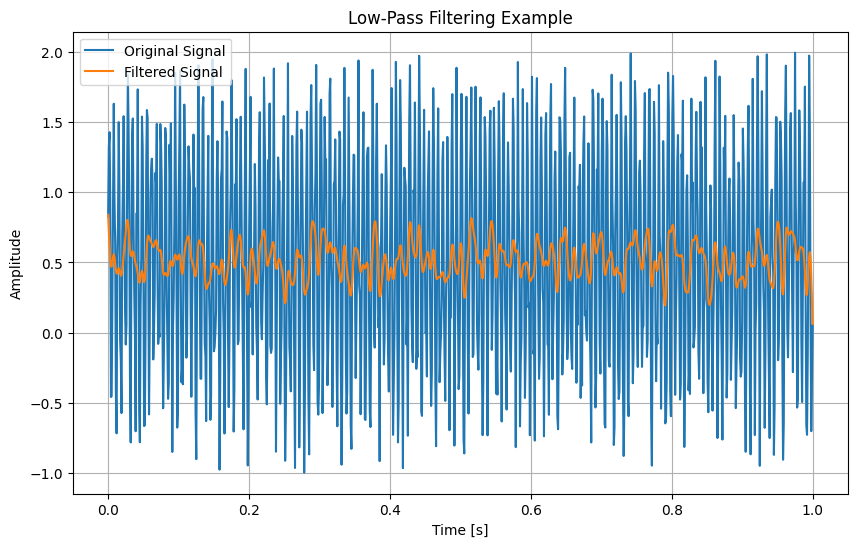

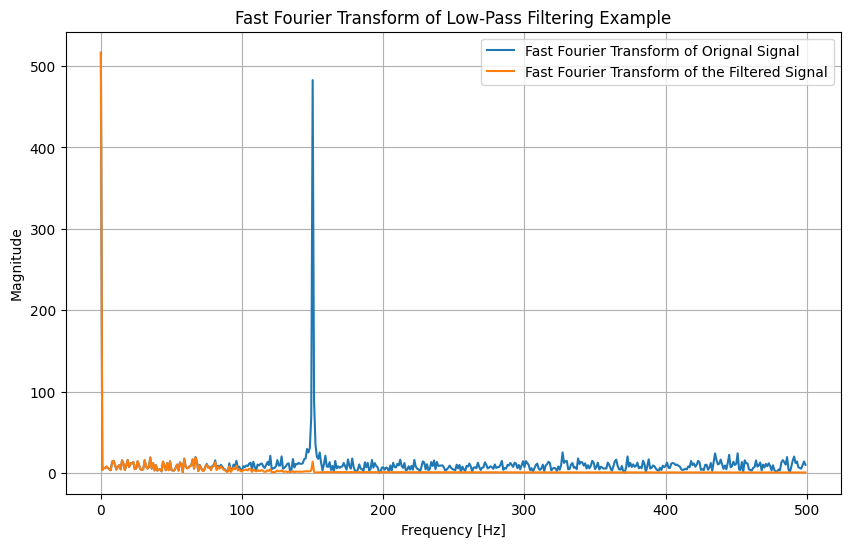

In [6]:
# Low Pass Filter Example in Python: Filters Signals Above 100 Hz
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Filter parameters
cutoff_frequency = 100 # cutoff frequency in Hz
fs = 1000 # Sampling Rate in Hz
order = 4 # Filter Order

# Design the low-pass filter
nyq = 0.5 * fs
normal_cutoff = cutoff_frequency / nyq
b, a = butter(order, normal_cutoff, btype='lowpass')

# Sample data (with time vector)
t = np.linspace(0, 1, 1000) # Time vector for 1 second signal
data = np.sin(2*np.pi*150*t) + np.random.rand(1000) # Example signal with noise

# Apply the filter
filtered_data = filtfilt(b, a, data)

# FFT Representation
fft_data = np.fft.fft(data)
freq_bins_data = np.arange(0, fs/2, step =(fs/len(fft_data)))

fft_filtered_data = np.fft.fft(filtered_data)
freq_bins_filtered_data = np.arange(0, 
                                    fs/2, step=(fs/len(fft_filtered_data)))

# Plot the original and the filtered data
plt.figure(figsize = (10, 6))

plt.plot(t, data, label='Original Signal')
plt.plot(t, filtered_data, label = 'Filtered Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Low-Pass Filtering Example')
plt.legend()
plt.grid(True)

plt.show()

# FFT of the Low-Pass Filtering Example
plt.figure(figsize=(10, 6))
plt.plot(freq_bins_data, np.abs(fft_data[0:len(fft_data)//2]), 
         label='Fast Fourier Transform of Orignal Signal')
plt.plot(freq_bins_filtered_data, 
         np.abs(fft_filtered_data[0:len(fft_filtered_data)//2]), 
         label='Fast Fourier Transform of the Filtered Signal')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Fast Fourier Transform of Low-Pass Filtering Example')
plt.legend()
plt.grid(True)
plt.show()

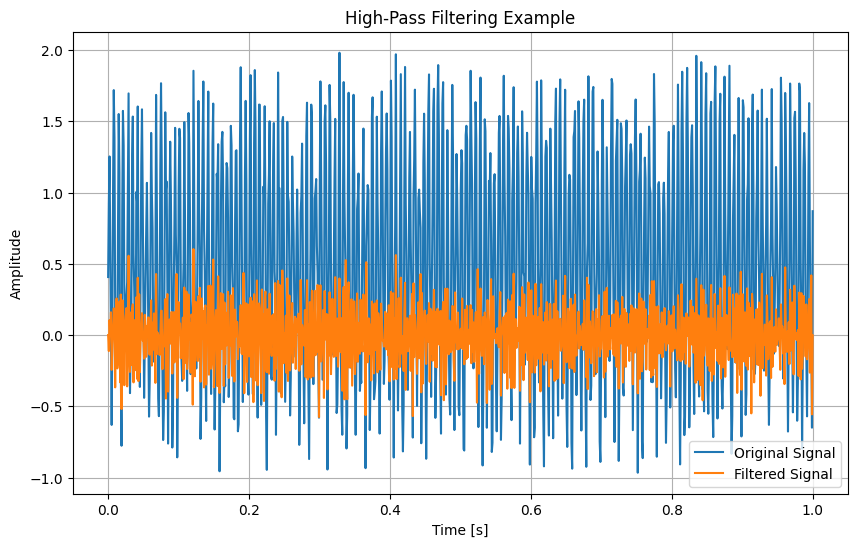

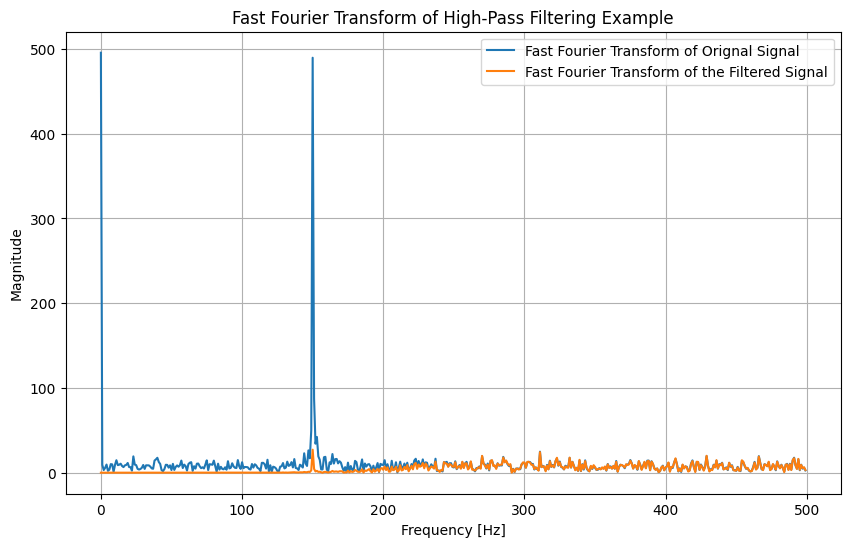

In [4]:
# High Pass Filter Example: Filters Signals Below 200 Hz
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Filter_parameters
cutoff_frequency = 200 # Cutoff frequency in Hz
fs = 1000 # Sample rate in Hz
order = 4 # Order of the filter

# Design the high-pass filter (change btype to 'highpass')
nyq = 0.5 * fs
normal_cutoff = cutoff_frequency / nyq
b, a = butter(order, normal_cutoff, btype='highpass') 

# Sample data (with time vector)
t = np.linspace(0, 1, 1000)
data = np.sin(2*np.pi*150*t) + np.random.rand(1000) # Example signal with noise

# Apply the filter
filtered_data = filtfilt(b, a, data)

# FFT & Plot
fft_data = np.fft.fft(data)
freq_bins_data = np.arange(0, fs/2, step =(fs/len(fft_data)))

fft_filtered_data = np.fft.fft(filtered_data)
freq_bins_filtered_data = np.arange(0, 
                                    fs/2, step=(fs/len(fft_filtered_data)))

# Plot the original and filtered data
plt.figure(figsize=(10, 6))

plt.plot(t, data, label='Original Signal')
plt.plot(t, filtered_data, label='Filtered Signal')

plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('High-Pass Filtering Example')
plt.legend()
plt.grid(True)

plt.show()

# FFT of the High-Pass Filtering Example
plt.figure(figsize=(10, 6))
plt.plot(freq_bins_data, np.abs(fft_data[0:len(fft_data)//2]), 
         label='Fast Fourier Transform of Orignal Signal')
plt.plot(freq_bins_filtered_data, 
         np.abs(fft_filtered_data[0:len(fft_filtered_data)//2]), 
         label='Fast Fourier Transform of the Filtered Signal')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Fast Fourier Transform of High-Pass Filtering Example')
plt.legend()
plt.grid(True)
plt.show()



## [Identifying the optimal threshold at which to filter the signal](https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71)

In [ ]:
type(freq_bins)

In [ ]:
SAMPLE_RATE = 20000
raw_neural_data, sr = librosa.load(data_file_list[0], sr = SAMPLE_RATE)

# It appears there is a trend in the data that is non-zero
detrend_y = scipy.signal.detrend(raw_neural_data)

# FFT = np.fft.fft(detrend_y)
FFT = np.fft.fft(detrend_y)
half_length_of_the_FFT = int(len(FFT)/2)

# Creating frequency bins
N = len(FFT)

freq_bins = np.arange(start=0, stop=(sr/2), step=(sr/N))

def fft_filter_custom(percentage, freq_bins, FFT):
    threshold = percentage * (2 * abs(FFT[0:len(FFT)//2]) / len(freq_bins)
                              ).max()
    # print(f"threshold: {threshold}")
    filtered_FFT = FFT.copy()
    filtered_FFT_mag = np.abs(filtered_FFT)
    filtered_FFT_mag = 2*filtered_FFT_mag / len(freq_bins)
    filtered_FFT[filtered_FFT_mag <= threshold]=0
    return filtered_FFT

percentage_list = np.linspace(0, 1, num=1000)

p_values = []
correlation_values = []
for percentage in percentage_list:
    fft_filtered_custom = fft_filter_custom(percentage, freq_bins, FFT)    
    filtered_signal = np.fft.ifft(fft_filtered_custom)
    residuals = stats.spearmanr(detrend_y, detrend_y - filtered_signal)
    p_values.append(residuals.pvalue)
    correlation_values.append(residuals.correlation)


In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.scatter(percentage_list, correlation_values, s=2, color='tab:green')
plt.title('Correlation between Filtered Signal and Detrended Signal')
plt.ylabel('Correlation Value')
plt.xlabel('Percentage of Filter')

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
plt.plot(percentage_list,p_values)
plt.title('Significance of the Correlations')
plt.ylabel('P-Value')
plt.xlabel('Percentage of Filter')
